# Life Expectancy and GDP - Data Analysis and Visualization 

#### Analysis Overview - 

Firstly, for clarification, Gross Domestic Product (GDP) is the total value of goods produced and services provided in a country during one year.  In this analysis, we will be looking over data of six countries which includes their Gross Domestic Product (GDP) and life expectancy from the year 2000 to 2015.  Within our analysis we will look to answer questions about life expectancy and the affect that GDP has on it, as well as the affect that life expectancy has on GDP.  We will discover where each country stands in terms of GDP and life expectancy and, if there happens to be a correlation between the two, we'll calculate predictions that can help us to better understand and prepare for the years to come.

#### Analysis Findings - 
* ```Higher GDP equals Higher Life Expectancy```
* ```Higher Life Expectancy DOES NOT equal Higher GDP necessarily```
* ```From 2000 to 2015, The United States experienced the lowest average yearly GDP growth (3.85% per year)```
* ```From 2000 to 2015, China experienced the highest average yearly GDP growth (16.1% per year)```
* ```From 2000 to 2015, Zimbabwe was the only country to experience any significant growth in average life expectancy (1.89% per year)```
* ```Every country experienced a net positive in GDP over the course of 16 years (2000 - 2015)```
* ```Every country experienced a net positive in life expectancy over the course of 16 years (2000 - 2015)```
* ```The lower the life expectancy, the greater the increase in life expectancy AS GDP increases```
* ```By the year 3026, each country's individual GDP, aside from China's, will NOT surpass the United States GDP.```
* ```By the year 2052, China's GDP will surpass the United States GDP.```

---

# Section 1 - Prepping The Data
* ```Examine the data```
* ```Understand the meaning of the data and what columns exist```
* ```Clean/modify the data where necessary```
* ```Come up with some questions based off of the data that we can further explore```

First things first, let's take a look at the data.  

Import the data into a dataframe named ```'df'``` using pandas.

In [ ]:
# Imports used for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('all_data.csv')

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

df.head()

Number of rows: 96
Number of columns: 4


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


When looking at the shape of the data, we see that there are 96 rows and 4 columns.  

Using ```df.head()``` we see the column names are:

- "Country"
- "Year"
- "Life expectancy at birth (years)
- "GDP"

When we want to manipulate a dataframe, we typically use the column names to do so.  To help ease our data manipulation processes, we need to make sure the column names are easily accessible.  In the next step, we'll modify any column names that might need to be simplified.

We should also find out what years the data spans and what countries the data covers.

In [ ]:
# Find out the unique countries in the dataset and how many there are
print(f'Number of unique countries: {df.Country.nunique()}')
print(f'List of countries: {df.Country.unique()}\n')

# Find out the unique years in the dataset and how many there are
print(f'Number of unique years: {df.Year.nunique()}')
print(f'List of years: {df.Year.unique()}')

Number of unique countries: 6
List of countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Number of unique years: 16
List of years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [ ]:
df.rename(columns={
  'Country': 'country',
  'Year': 'year',
  'Life expectancy at birth (years)': 'leabiy',
  'GDP': 'gdp'}, 
  inplace=True)

df.head()

,country,year,leabiy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We can see that we are working with 6 countries across a time span from 2000 to 2015.

We now also have a dataframe with more accessible column names.

Let's move on to some summary statistics of our dataset.  

First we'll check to make sure we aren't missing any data within our dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  96 non-null     object 
 1   year     96 non-null     int64  
 2   leabiy   96 non-null     float64
 3   gdp      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Using ```df.info()``` we can see that each of our columns contain ```96 non-null``` entries, which means we aren't "necessarily" missing any data because the length of the dataframe is also 96 entries.

Sometimes data can contain weird values within a column of dataframe and that would have to be cleaned up before we could really dive in to our analysis.

We also can see that year is datatype ```int64```, which isn't really an issue, but we aren't using the ```year``` column to make any calculations so we could change it to a string for better use.

In [ ]:
df.year = df.year.astype('string')
df.dtypes

country     object
year        string
leabiy     float64
gdp        float64
dtype: object

Now with the ```year``` column changed to type ```string```, we'll move on.

We will do some manual calculations for some summary statistics to better convey the results, but using ```df.describe(include='all')``` will also show us a range of summary statistics with ease.

In [ ]:
df.describe(include='all')

,country,year,leabiy,gdp
count,96,96,96.000000,9.600000e+01
unique,6,16,NaN,NaN
top,Chile,2000,NaN,NaN
freq,16,6,NaN,NaN
mean,NaN,NaN,72.789583,3.880499e+12
std,NaN,NaN,10.672882,5.197561e+12
min,NaN,NaN,44.300000,4.415703e+09
25%,NaN,NaN,74.475000,1.733018e+11
50%,NaN,NaN,76.750000,1.280220e+12
75%,NaN,NaN,78.900000,4.067510e+12


---

# Section 2 - Analyzing GDP and Life Expectancy
#### Questions that can guide our analysis:
* ```What countries have the highest life expectancy?```
* ```What countries have the highest GDP?```
* ```Do life expectancy and GDP have any relationship to one another?  If so, how do they relate?```
* ```Do countries with higher GDP's tend to have longer life expectancies or shorter life expectancies?```
* ```Does having a longer life expectancy mean that a country will have a high GDP?```

In [ ]:
# Life expectancy stats
le_min = round(df.leabiy.min(), 2)
le_avg = round(df.leabiy.mean(), 2)
le_max = round(df.leabiy.max(), 2)

le_min_country = df.country[df.leabiy == df.leabiy.min()]
le_min_idx = le_min_country.index[0]
le_max_country = df.country[df.leabiy == df.leabiy.max()]
le_max_idx = le_max_country.index[0]

print(f'Shortest life expectancy: {le_min} years ({le_min_country[le_min_idx]})')
print(f'Average life expectancy: {le_avg} years')
print(f'Longest life expectancy: {le_max} years ({le_max_country[le_max_idx]})\n')

# GDP stats
gdp_min = round(df.gdp.min(), 2)
gdp_avg = round(df.gdp.mean(), 2)
gdp_max = round(df.gdp.max(), 2)

gdp_min_country = df.country[df.gdp == df.gdp.min()]
gdp_min_idx = gdp_min_country.index[0]
gdp_max_country = df.country[df.gdp == df.gdp.max()]
gdp_max_idx = gdp_max_country.index[0]

print(f'Smallest GDP: {gdp_min} USD ({gdp_min_country[gdp_min_idx]})')
print(f'Average GDP: {gdp_avg} USD')
print(f'Largest GDP: {gdp_max} USD ({gdp_max_country[gdp_max_idx]})')


Shortest life expectancy: 44.3 years (Zimbabwe)
Average life expectancy: 72.79 years
Longest life expectancy: 81.0 years (Germany)

Smallest GDP: 4415702800.0 USD (Zimbabwe)
Average GDP: 3880498570768.4 USD
Largest GDP: 18100000000000.0 USD (United States of America)


After doing some calculations, we do see that Zimbabwe had the shortest life expectancy recorded and also the smallest GDP recorded.  Though this is interesting, it doesn't tell us much because we are unsure what year these stats were recorded but it opens the data up to further exploration!

Before jumping into plotting some graphs, we could also readdress the code block above and add in a year calculation to see if the years matched up with the low GDP and life expectancy.  Let's see!

In [ ]:
small_le_year = df.year[df.leabiy == df.leabiy.min()]
small_le_year_idx = small_le_year.index[0]
small_gdp_year = df.year[df.gdp == df.gdp.min()]
small_gdp_year_idx = small_le_year.index[0]

print(f'Year of shortest life expectancy: {small_le_year[small_le_year_idx]}')
print(f'Year of smallest GDP: {small_le_year[small_le_year_idx]}')

Year of shortest life expectancy: 2004
Year of smallest GDP: 2004


Doing this shows that for the year of 2004, Zimbabwe did have the shortest life expectancy, as well as the smallest GDP!  

Let's find out if this relationship holds up for the entire dataset by creating some visualizations.

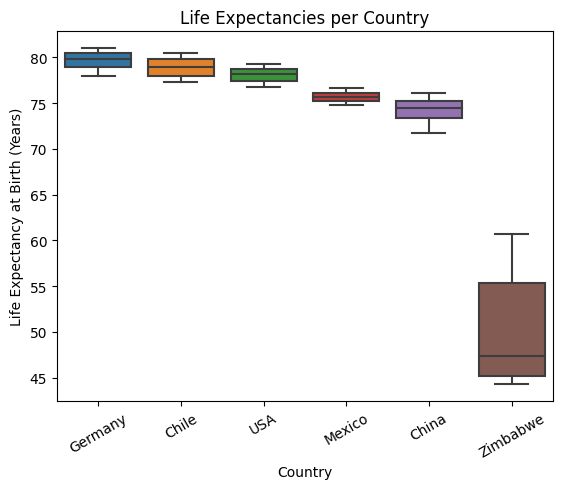

<Figure size 640x480 with 0 Axes>

In [ ]:
# Box plot of life expectancy for each country
sns.boxplot(x='country', y='leabiy', data=df, order=['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe'])
ax = plt.subplot()
ax.set_xticks(range(df.country.nunique()))
ax.set_xticklabels(['Germany', 'Chile', 'USA', 'Mexico', 'China', 'Zimbabwe'], rotation=30)
plt.title('Life Expectancies per Country')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.xlabel('Country')
plt.show()
plt.clf()

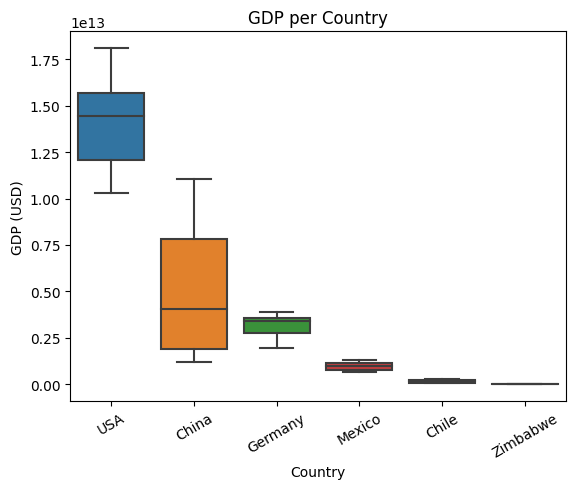

<Figure size 640x480 with 0 Axes>

In [ ]:
# Box plot of GDP for each country
sns.boxplot(x='country', y='gdp', data=df, order=['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe'])
ax = plt.subplot()
ax.set_xticks(range(df.country.nunique()))
ax.set_xticklabels(['USA', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe'], rotation=30)
plt.title('GDP per Country')
plt.ylabel('GDP (USD)')
plt.xlabel('Country')
plt.show()
plt.clf()

We can very clearly see again that Zimbabwe has the shortest life expectancy and the smallest GDP but what about the other countries?  

We see that these countries are all much higher than Zimbabwe in life expectancy and higher than Zimbabwe in GDP as well but still it's hard to see anything else with these two plots.

It's also hard to read the GDP the way the column is formatted because the numbers are so large.  We can create a new column that attempts to simplify the GDP numbers into something more understandable.  

We'll convert all of the numbers within the column into billions because the smallest GDP is 4 billion, as we saw earlier.  If we went with trillions (or anything more than billions) then we would have some numbers less than 0 on our graphs.  We do not want that.  This is because not all countries have GDP's in the trillions.

In [ ]:
# Visual of checking place value of smallest GDP
# create variable 'gdp' to equal the smallest GDP to simplify code
gdp = str(round(df.gdp.min()))
place = ['billion <---', 'million', 'thousand', '(hundreds)']

print(f'Smallest GDP: {gdp[0]},{gdp[1:4]},{gdp[4:7]},{gdp[7:10]}\n')

for i in range(0, len(gdp), 3):
  num = gdp[i - 2] + gdp[i - 1] + gdp[i]
  if i == 0:
    print(f'{num} {place[0]}')
  else:
    print(f'{num} {place[round(i / 3)]}')

print('\nThis number is in the billions!')

print(f'\n{gdp[0]},{gdp[1:4]},{gdp[4:7]},{gdp[7:10]}')
print(f"{'1,000,000,000'} <--- Number to divide the \'df.gdp\' column by")

Smallest GDP: 4,415,702,800

004 billion <---
415 million
702 thousand
800 (hundreds)

This number is in the billions!

4,415,702,800
1,000,000,000 <--- Number to divide the 'df.gdp' column by


Use the ```.apply()``` method to apply the lambda function ```(x / 1000000000)``` to every GDP number in the ```df.gdp``` column.

In [ ]:
df['gdp_in_billions'] = df.gdp.apply(lambda x: x / 1000000000)
df.head()

,country,year,leabiy,gdp,gdp_in_billions
0,Chile,2000,77.3,7.786093e+10,77.860932
1,Chile,2001,77.3,7.097992e+10,70.979924
2,Chile,2002,77.8,6.973681e+10,69.736811
3,Chile,2003,77.9,7.564346e+10,75.643460
4,Chile,2004,78.0,9.921039e+10,99.210393


Creating a new column for the GDP in terms of billions makes the number much more understandable.

With the new column, let's create a plot that shows us the relation between life expectancy and GDP.

We'll pick a scatter plot since life expectancy and GDP are both quantitative variables.

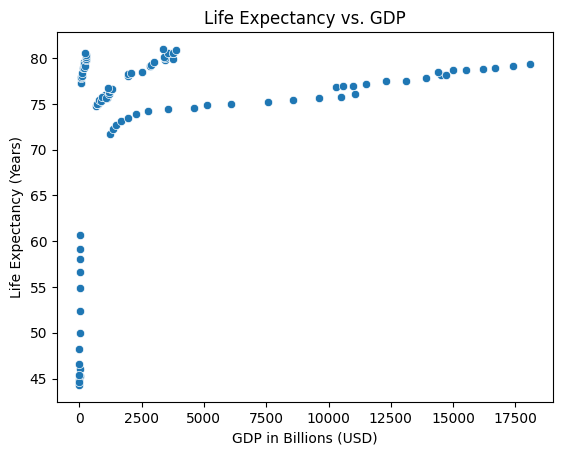

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.scatterplot(x='gdp_in_billions', y='leabiy', data=df)
plt.title(f'Life Expectancy vs. GDP')
plt.xlabel('GDP in Billions (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.show()
plt.clf()

Looking at the graph, we can see multiple clusters of points, though they are not completely discernable.  The clusters all seem to have some sort of positive correlation, but why the clustering?

Each cluster is actually the group of points from each country within the dataset.  

If we update the graph to include a third variable, ```hue='country'```, then we can better see the distinction.

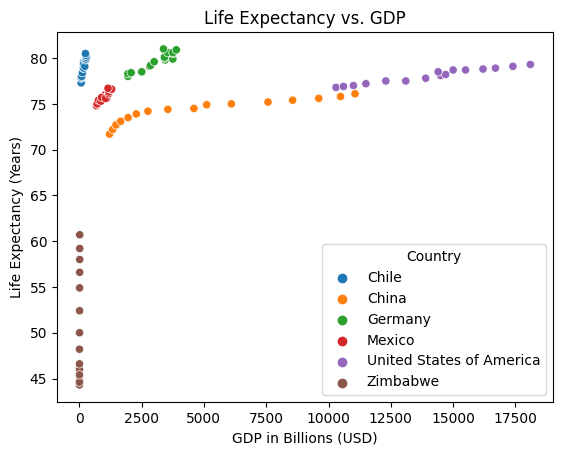

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.scatterplot(x='gdp_in_billions', y='leabiy', hue='country', data=df)
plt.title(f'Life Expectancy vs. GDP')
plt.xlabel('GDP in Billions (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Country')
plt.show()
plt.clf()

Wow, that is much better!  We can easily see the distinction now and we can clealy see that, as GDP rises, life expectancy rises as well.  Even if it's just a slight increase, it is an increase nonetheless.

Now, this still leaves some questions though.  What is going on with Zimbabwe?  Looking at this graph, we could almost say that Zimbabwe's GDP didn't increase at all and that the GDP is hovering around 0 billion dollars.  Since some of the other countries have such high GDP's, it's making Zimbabwe's GDP look miniscule.  Not only Zimbabwe, but Chile and Mexico too.

If we create a loop and filter our dataframe to only display one country at a time, and then plot the data, this should fix our issue.

For extra practice and for a clear visualization, we will also plot a line of best fit using the ```statsmodels``` library to build a linear regression model.

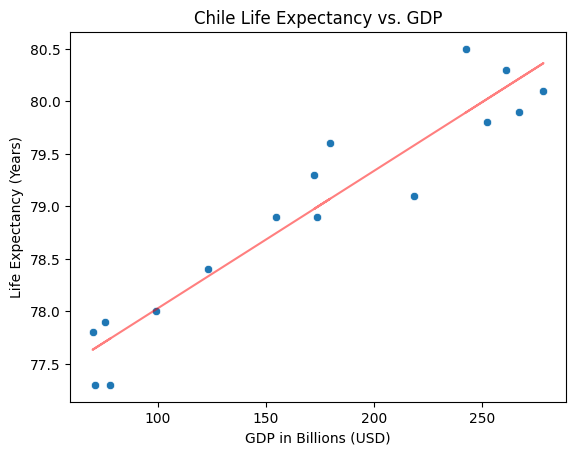

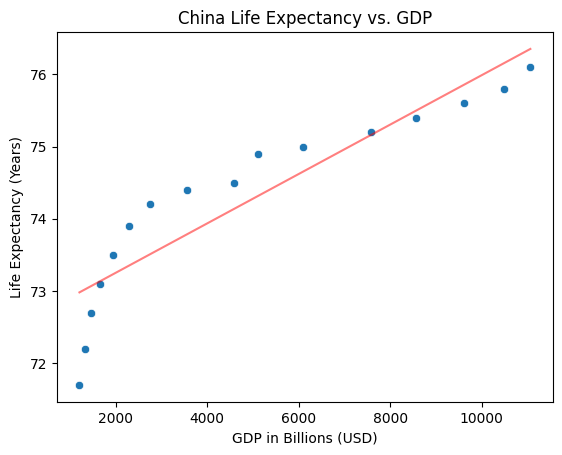

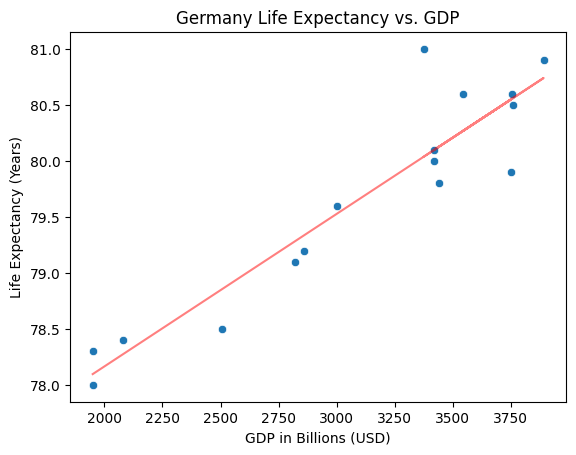

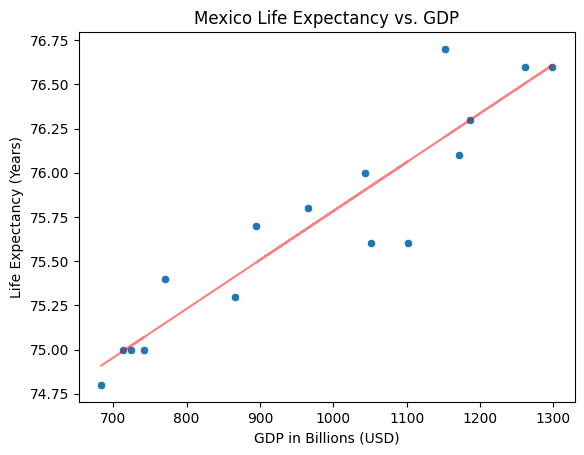

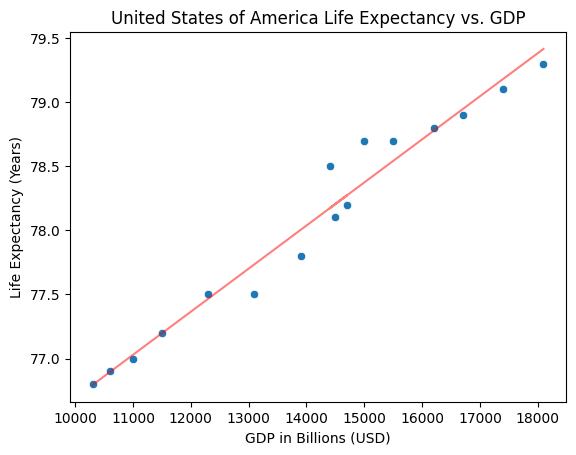

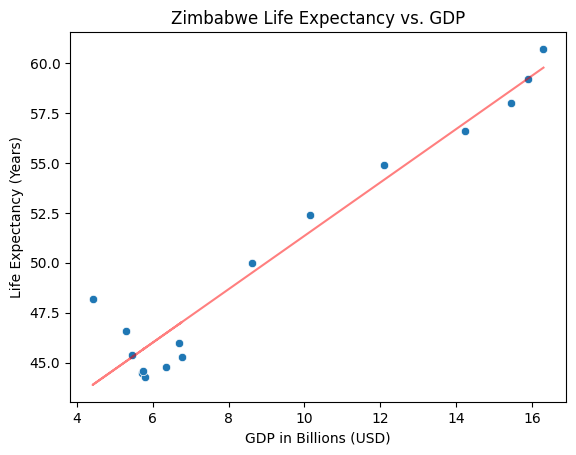

<Figure size 640x480 with 0 Axes>

In [ ]:
for country in df.country.unique():
  df_country = df[df.country == country]

  # Create linear regression model
  model = sm.OLS.from_formula('leabiy ~ gdp_in_billions', df_country).fit()
  b, m = model.params
  y = m * df_country.gdp_in_billions + b

  sns.scatterplot(x='gdp_in_billions', y='leabiy', data=df_country)
  plt.plot(df_country.gdp_in_billions, y, alpha=0.5, linewidth = 1.5, color='r')
  plt.title(f'{country} Life Expectancy vs. GDP')
  plt.xlabel('GDP in Billions (USD)')
  plt.ylabel('Life Expectancy (Years)')
  plt.show()
  plt.clf()

All 6 countries display a strong correlation between GDP and life expectancy.  No matter the starting GDP (lower or higher than another country), when GDP increases, life expectancy all increases.

The most dramatic increase in life expectancy that we can visualize is in Zimbabwe, where lowest point is less than 45 years and the highest point is greater than 60 years.

According to our data, if a country has a high GDP, they also have a relatively high life expectancy.  This can't be said for the inverse of the two though.  If a country has a high life expectancy, such as Chile, it doesn't necessarily mean that the GDP will also be high.  Chile and Germany specifically have very high life expectancies while having far less GDP than the United States and China.

This means that there are most likely other unknown factors that affect life expectancy that are not shown within our current dataset.

___```Section 2 Conclusions```___

- ```Higher GDP equals Higher Life Expectancy```
- ```Higher Life Expectancy DOES NOT equal Higher GDP necessarily```

---

# Section 3 - Analyzing Yearly Data
#### Questions to help guide our analysis:
* ```Is there a particular year(s) in which each countries individual GDP increased?```
* ```Any particular year(s) in which each countries individual life expectancy increased?```
* ```On average, what is the yearly change in GDP for each country?```
* ```On average, what is the yearly change in life expectancy for each country?```

Let's start by plotting GDP against the years column to see how GDP's change yearly across all countries in our dataset.

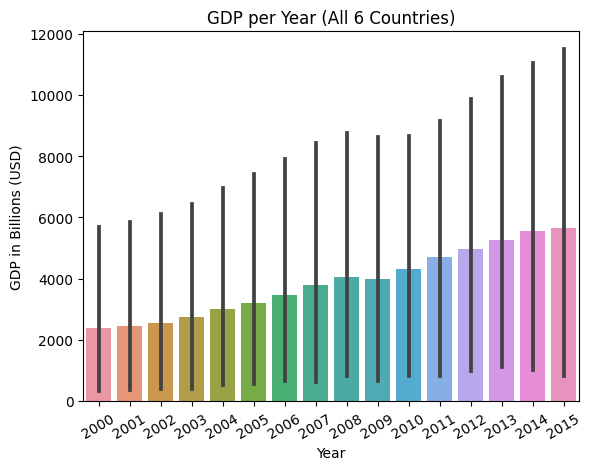

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.barplot(x='year', y='gdp_in_billions', data=df)
plt.title('GDP per Year (All 6 Countries)')
plt.xlabel('Year')
plt.ylabel('GDP in Billions (USD)')
ax = plt.subplot()
ax.set_xticks(range(len(df.year.unique())))
ax.set_xticklabels(df.year.unique(), rotation = 30)
plt.show()
plt.clf()

For every year in our dataset, the average GDP of the 6 countries increased, aside from 2009, where it decreased slightly.  This could be due do the economic crisis that occurred in 2008 but that is only speculation and outside of the scope of this dataset. 

Now that we see how GDP changes yearly for the average of all the countries, let's break it down and see how it changes yearly for each individual country.

We'll make a bar chart for each country plotting GDP against years using a ```for``` loop.  Along with the bar chart, we'll also calculate the average difference in GDP from year to year for each country to get an idea of growth (or decline).

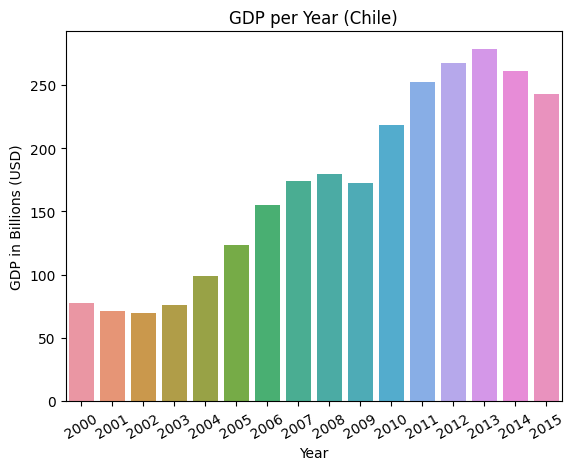

Chile's average GDP growth per year: 10.98 billion dollars
Chile's average percent increase in GDP per year: 8.63%


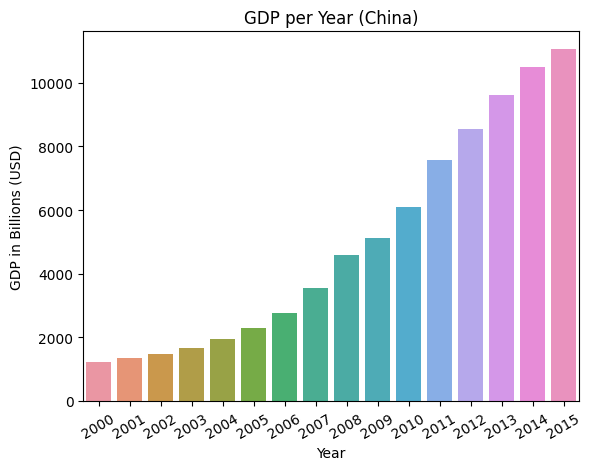

China's average GDP growth per year: 656.89 billion dollars
China's average percent increase in GDP per year: 16.1%


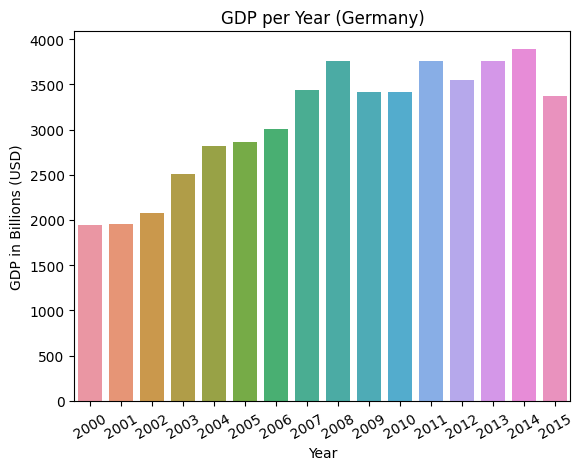

Germany's average GDP growth per year: 95.04 billion dollars
Germany's average percent increase in GDP per year: 4.09%


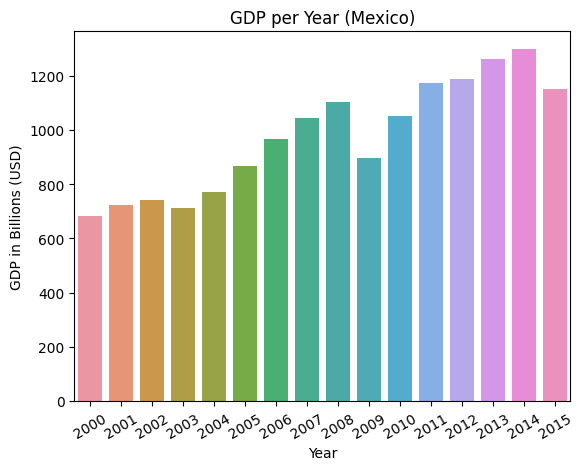

Mexico's average GDP growth per year: 31.24 billion dollars
Mexico's average percent increase in GDP per year: 3.97%


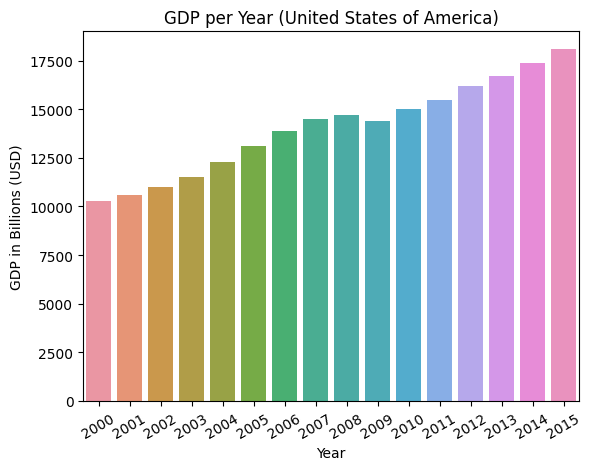

United States of America's average GDP growth per year: 520.0 billion dollars
United States of America's average percent increase in GDP per year: 3.85%


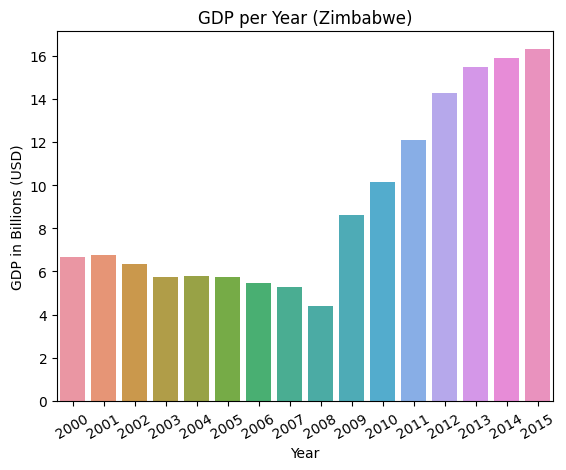

Zimbabwe's average GDP growth per year: 0.64 billion dollars
Zimbabwe's average percent increase in GDP per year: 8.32%


Average percent increases in GDP per country per year (2000 - 2015):

1. China - 16.1% (656.89 billion dollars)
2. Chile - 8.63% (10.98 billion dollars)
3. Zimbabwe - 8.32% (0.64 billion dollars)
4. Germany - 4.09% (95.04 billion dollars)
5. Mexico - 3.97% (31.24 billion dollars)
6. United States of America - 3.85% (520.0 billion dollars)


<Figure size 640x480 with 0 Axes>

In [ ]:
percent_dict = {} # For 3 

# Loop through each country and create a barplot
for country in df.country.unique():
  df_country = df[df.country == country]
  sns.barplot(x='year', y='gdp_in_billions', data=df_country)
  plt.title(f'GDP per Year ({country})')
  plt.xlabel('Year')
  plt.ylabel('GDP in Billions (USD)')
  ax = plt.subplot()
  ax.set_xticks(range(len(df_country.year.unique())))
  ax.set_xticklabels(df_country.year.unique(), rotation=30)
  plt.show()
  plt.clf()

  # 1. Calculating average growth/decline in GDP per year 
  # 2. Calculate percent increase/decrease per year
  # 3. Create a descending dictionary of percent increase/decrease per year (beginning of code block) 
    
  avg_diff_lst = [] # For 1
  avg_diff_perc_lst = [] # For 2

  gdp_b = df_country.gdp_in_billions
  for i in range(len(gdp_b)):
    if i == len(gdp_b) - 1:
      break
    difference = gdp_b.iloc[i + 1] - gdp_b.iloc[i]
    avg_diff_lst.append(difference)
    avg_diff_perc_lst.append((difference / gdp_b.iloc[i]) * 100)

  avg_diff_lst = np.array(avg_diff_lst)
  avg_diff_perc_lst = np.array(avg_diff_perc_lst)
  
  avg_diff = round(avg_diff_lst.mean(), 2)
  avg_diff_percent = round(avg_diff_perc_lst.mean(), 2)

  if avg_diff > 0:
    print(f'{country}\'s average GDP growth per year: {avg_diff} billion dollars')
    print(f'{country}\'s average percent increase in GDP per year: {avg_diff_percent}%')
  if avg_diff < 0:
    print(f'{country}\'s average GDP decline per year: {avg_diff} billion dollars')
    print(f'{country}\'s average percent decrease in GDP per year: {avg_diff_percent}%')

  percent_dict[country] = [avg_diff_percent, avg_diff]

# Order the percent_dict dictionary in descending order and print
percent_dict_ordered = {}

while len(percent_dict_ordered) < len(percent_dict):
  biggest = None
  for k, v in percent_dict.items():
    if k in percent_dict_ordered:
      continue
    if not biggest or v[0] > biggest[1]:
      biggest = [k, v[0], v[1]]
  percent_dict_ordered[biggest[0]] = f'{biggest[1]}% ({biggest[2]} billion dollars)'

print()
print(f'\nAverage percent increases in GDP per country per year (2000 - 2015):\n')

num = 1
for k, v in percent_dict_ordered.items():
  print(f'{num}. {k} - {v}')
  num += 1

Take each countries individual calculations and use them to get the total average calculations for all countries.

In [ ]:
tot_avg_gdp = [656.89, 10.98, 0.64, 95.04, 31.24, 520.0]
tot_avg_gdp_perc = [16.1, 8.63, 8.32, 4.09, 3.97, 3.85]

tot_avg_gdp = np.array(tot_avg_gdp)
tot_avg_gdp_perc = np.array(tot_avg_gdp_perc)

tot_avg_gdp = round(tot_avg_gdp.sum() / len(tot_avg_gdp), 2)
tot_avg_gdp_perc = round(tot_avg_gdp_perc.sum() / len(tot_avg_gdp_perc), 2)

print(f'Total average GDP growth per year: {tot_avg_gdp} billion dollars')
print(f'Total average percent increase in GDP per year: {tot_avg_gdp_perc}%')

Total average GDP growth per year: 219.13 billion dollars
Total average percent increase in GDP per year: 7.49%


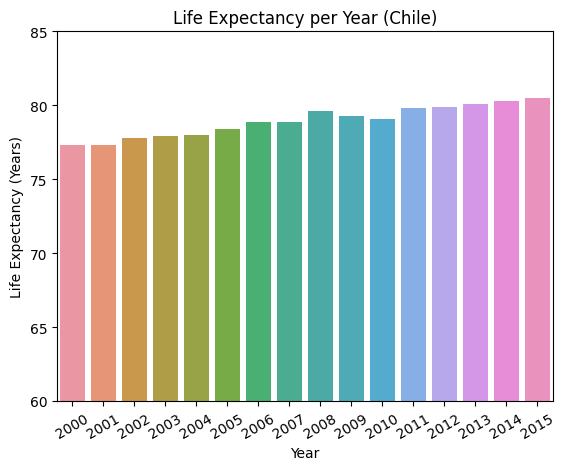

Chile's average life expectancy growth per year: 0.21 years
Chile's average percent increase in life expectancy per year: 0.27%


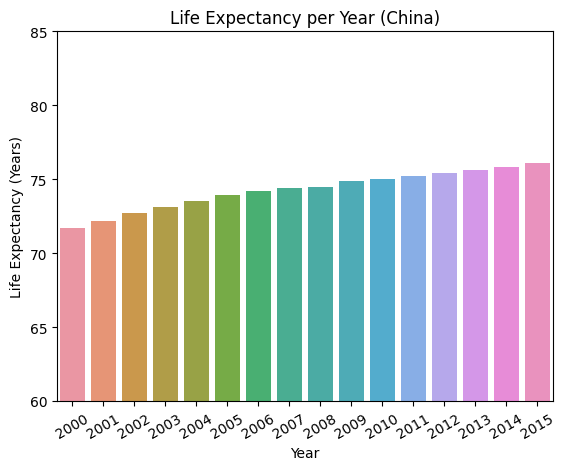

China's average life expectancy growth per year: 0.29 years
China's average percent increase in life expectancy per year: 0.4%


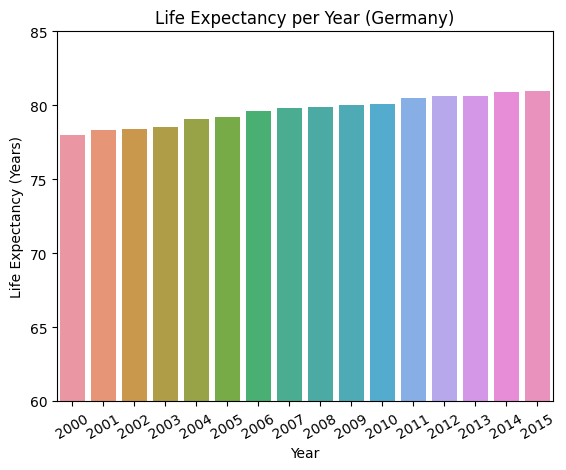

Germany's average life expectancy growth per year: 0.2 years
Germany's average percent increase in life expectancy per year: 0.25%


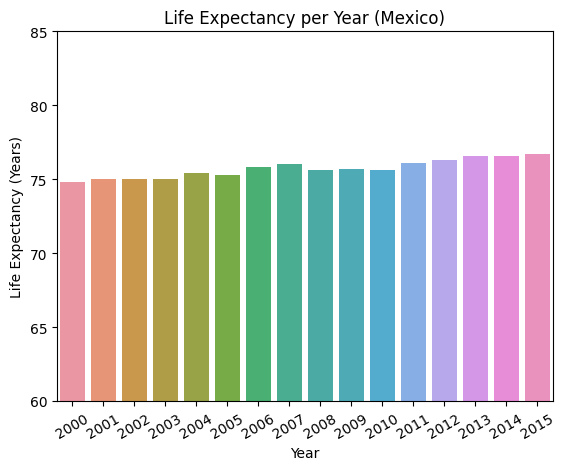

Mexico's average life expectancy growth per year: 0.13 years
Mexico's average percent increase in life expectancy per year: 0.17%


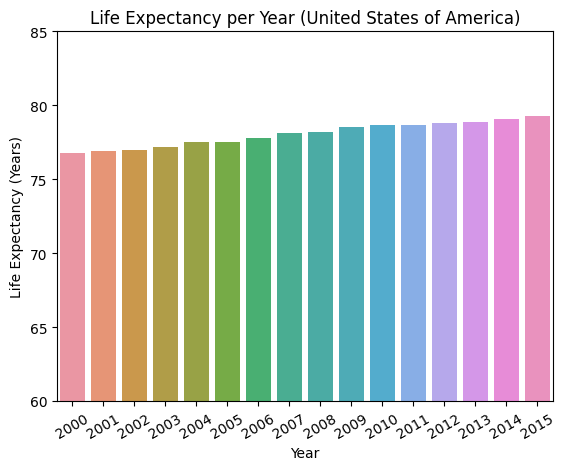

United States of America's average life expectancy growth per year: 0.17 years
United States of America's average percent increase in life expectancy per year: 0.21%


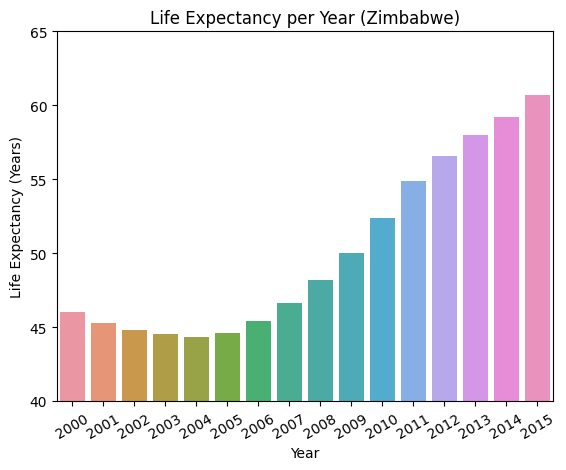

Zimbabwe's average life expectancy growth per year: 0.98 years
Zimbabwe's average percent increase in life expectancy per year: 1.89%


Average percent increases in life expectancy per country per year (2000 - 2015):

1. Zimbabwe - 1.89% (0.98 years)
2. China - 0.4% (0.29 years)
3. Chile - 0.27% (0.21 years)
4. Germany - 0.25% (0.2 years)
5. United States of America - 0.21% (0.17 years)
6. Mexico - 0.17% (0.13 years)


<Figure size 640x480 with 0 Axes>

In [ ]:
percent_dict = {} # For 3

# Loop through each country and create a barplot
for country in df.country.unique():
  df_country = df[df.country == country]
  sns.barplot(x='year', y='leabiy', data=df_country)
  plt.title(f'Life Expectancy per Year ({country})')
  plt.xlabel('Year')
  plt.ylabel('Life Expectancy (Years)')
  if country == 'Zimbabwe':
    plt.axis([-0.5, len(df_country.year) - 0.5, 40, 65])
  else:
    plt.axis([-0.5, len(df_country.year) - 0.5, 60, 85])
  ax = plt.subplot()
  ax.set_xticks(range(len(df_country.year.unique())))
  ax.set_xticklabels(df_country.year.unique(), rotation=30)
  plt.show()
  plt.clf()

  # 1. Calculating average growth/decline in GDP per year 
  # 2. Calculate percent increase/decrease per year
  # 3. Create a descending dictionary of percent increase/decrease per year (beginning of code block) 
    
  avg_diff_lst = [] # For 1
  avg_diff_perc_lst = [] # For 2

  leabiy = df_country.leabiy
  for i in range(len(leabiy)):
    if i == len(leabiy) - 1:
      break
    difference = leabiy.iloc[i + 1] - leabiy.iloc[i]
    avg_diff_lst.append(difference)
    avg_diff_perc_lst.append((difference / leabiy.iloc[i]) * 100)

  avg_diff_lst = np.array(avg_diff_lst)
  avg_diff_perc_lst = np.array(avg_diff_perc_lst)
  
  avg_diff = round(avg_diff_lst.mean(), 2)
  avg_diff_percent = round(avg_diff_perc_lst.mean(), 2)

  if avg_diff > 0:
    print(f'{country}\'s average life expectancy growth per year: {avg_diff} years')
    print(f'{country}\'s average percent increase in life expectancy per year: {avg_diff_percent}%')
  if avg_diff < 0:
    print(f'{country}\'s average life expectancy decline per year: {avg_diff} years')
    print(f'{country}\'s average percent decrease in life expectancy per year: {avg_diff_percent}%')

  percent_dict[country] = [avg_diff_percent, avg_diff]

# Order the percent_dict dictionary in descending order and print
percent_dict_ordered = {}

while len(percent_dict_ordered) < len(percent_dict):
  biggest = None
  for k, v in percent_dict.items():
    if k in percent_dict_ordered:
      continue
    if not biggest or v[0] > biggest[1]:
      biggest = [k, v[0], v[1]]
  percent_dict_ordered[biggest[0]] = f'{biggest[1]}% ({biggest[2]} years)'

print()
print(f'\nAverage percent increases in life expectancy per country per year (2000 - 2015):\n')

num = 1
for k, v in percent_dict_ordered.items():
  print(f'{num}. {k} - {v}')
  num += 1

Take each countries individual calculations and use them to get the total average calculations for all countries.

In [ ]:
tot_avg_le = [0.98, 0.29, 0.21, 0.2, 0.17, 0.13]
tot_avg_le_perc = [1.89, 0.4, 0.27, 0.25, 0.21, 0.17]

tot_avg_le = np.array(tot_avg_le)
tot_avg_le_perc = np.array(tot_avg_le_perc)

tot_avg_le = round(tot_avg_le.sum() / len(tot_avg_le), 2)
tot_avg_le_perc = round(tot_avg_le_perc.sum() / len(tot_avg_le_perc), 2)

print(f'Total average life expectancy growth per year: {tot_avg_le} years')
print(f'Total average percent increase in life expectancy per year: {tot_avg_le_perc}%')

Total average life expectancy growth per year: 0.33 years
Total average percent increase in life expectancy per year: 0.53%


From 2000 to 2015, every country in our dataset has experienced a positive overall GDP growth with the highest average percent increase of GDP being 16.1% a year in China.  The lowest growth percentage we see is in The United States at 3.85%.  

From 2000 to 2015, every country also experienced a positive overall growth in life expectancy, though it was incredibly small.  The only country who had any significant increases in life expectancy was Zimbabwe, who almost experienced an average of a 1 year increase in life expectancy from 2000 to 2015.

Since we are calculating the average differences in GDP and life expectancy that occur each year, we should be able to make predictions for what the GDP will be years from now, assuming it doesn't approach a plateau, and what the life expectancy will be based off of a given GDP.

Let's attempt to predict some future results in the final section of the analysis!

___```Section 3 conclusions:```___

- ```Every country experienced a net positive in GDP over the course of 16 years (2000 - 2015)```
- ```Every country experienced a net positive in life expectancy over the course of 16 years (2000 - 2015)```
- ```The lower the life expectancy, the greater the increase in life expectancy AS GDP increases```

---

# Section 4 - Making Future Predictions 
#### Possible predictions to look into:
* ```Can we predict future GDP for a given year?```
* ```Can we predict future life expectancy givin future GDP?```
* ```Is there a point in which a certain country's GDP will exceed another?```

Up to this point we've seen a lot of charts/graphs of current data, but in order to prepare for futrue events, we need to make predictions based off of the current data.

We will make predictions for each country by predicting the GDP, given the year, followed by the life expectancy, given the predicted GDP, from the given year.

We will use the year 2025 in our examples, but before we do so, we need to change the ```year``` column back into an integer.  This is because we can't use our model on a string datatype, which is what the ```year``` column's datatype currently is.

In [ ]:
df.year = df.year.astype(int)

In [ ]:
predicted_gdps = {}

for country in df.country.unique():
  df_country = df[df.country == country]

  # Create linear regression model
  model = sm.OLS.from_formula('gdp_in_billions ~ year', df_country).fit()
  b, m = model.params 
  x = 2025
  year = 2025
  
  # Find 'y' using the slope(m) and the y-intercept(b) --> (y = mx + b)
  y = m * x + b

  print(f'The expected GDP for {country} in {year} is {round(y, 2)} billion dollars')

  predicted_gdps[country] = round(y, 2)

The expected GDP for Chile in 2025 is 441.72 billion dollars
The expected GDP for China in 2025 is 17433.62 billion dollars
The expected GDP for Germany in 2025 is 5289.03 billion dollars
The expected GDP for Mexico in 2025 is 1698.52 billion dollars
The expected GDP for United States of America in 2025 is 22927.94 billion dollars
The expected GDP for Zimbabwe in 2025 is 22.3 billion dollars


Above we can see the GDP predictions made for each country in our dataset.  Keep in mind that these are just predictions and we can't assume that these are correct or incorrect, but we can use them to make other future predictions, and/or make important decisions that will help us to reach the predicted outcomes.

Now we have saved all of the predicted GDP's for each country, for the year of 2025, into a dictionary named ```predicted_gdps```.  

We can now use the predicted GDP's to make a model to calculate life expectancy based off of the predicted GDP's.  We will do this the same way we did our model for the GDP prediction.  

In [ ]:
for country in df.country.unique():
  df_country = df[df.country == country]

  # Create linear regression model
  model = sm.OLS.from_formula('leabiy ~ gdp_in_billions', df_country).fit()
  b, m = model.params 
  x = predicted_gdps[country]
  
  # Find 'y' using the slope(m) and the y-intercept(b) --> (y = mx + b)
  y = m * x + b 

  print(f'The expected life expectancy for {country} in {year} is {round(y, 2)} years')

The expected life expectancy for Chile in 2025 is 82.5 years
The expected life expectancy for China in 2025 is 78.53 years
The expected life expectancy for Germany in 2025 is 82.65 years
The expected life expectancy for Mexico in 2025 is 77.71 years
The expected life expectancy for United States of America in 2025 is 81.04 years
The expected life expectancy for Zimbabwe in 2025 is 67.77 years


This is great!  If the countries within our dataset continue to progress similarly to how they progressed from 2000 to 2015, then they should expect to increase their individual average life expectancies to the number of years listed above!

For our final question, since we live in the United States, we would like to find out the point in which every other country's GDP exceeds the United States GDP, based off of our model.  

We will use a loop to figure out the year in which each countries GDP will exceed the GDP of the United States, that is, if it ever does.

Let's find out!

In [ ]:
for country in df.country.unique():
  if country != 'United States of America':
    continue
  df_country = df[df.country == country]

  us_model = sm.OLS.from_formula('gdp_in_billions ~ year', df_country).fit()
  us_b, us_m = us_model.params 
  x = 2025

In [ ]:
for country in df.country.unique():
  if country == 'United States of America':
    continue
  df_country = df[df.country == country]

  # Create linear regression model for GDP given year
  model = sm.OLS.from_formula('gdp_in_billions ~ year', df_country).fit()
  b, m = model.params 
  x = 2025

  y = m * x + b
  us_y = us_m * x + us_b
  
  # Simulate 1000 years to see if and when the GDP of another country will exceed the GDP of the US
  counter = 0
  while y < us_y:
    if counter > 1000:
      break
    x += 1
    y = m * x + b
    us_y = us_m * x + us_b
    counter += 1
  
  year = x

  print(f'{country} GDP in {year}: {round(y, 2)} billion dollars')
  print(f'United States GDP in {year}: {round(us_y, 2)} billion dollars')

  if y > us_y:
    print(f'The GDP for {country} IS expected to surpass the United States GDP in {year} at {round(y, 2)} billion dollars\n')
  else:
    print(f'The GDP for {country} is NOT expected to surpass the United States GDP by {year}\n')

Chile GDP in 3026: 15996.09 billion dollars
United States GDP in 3026: 529316.18 billion dollars
The GDP for Chile is NOT expected to surpass the United States GDP by 3026

China GDP in 2052: 36682.16 billion dollars
United States GDP in 2052: 36586.76 billion dollars
The GDP for China IS expected to surpass the United States GDP in 2052 at 36682.16 billion dollars

Germany GDP in 3026: 130800.22 billion dollars
United States GDP in 3026: 529316.18 billion dollars
The GDP for Germany is NOT expected to surpass the United States GDP by 3026

Mexico GDP in 3026: 42989.27 billion dollars
United States GDP in 3026: 529316.18 billion dollars
The GDP for Mexico is NOT expected to surpass the United States GDP by 3026

Zimbabwe GDP in 3026: 779.2 billion dollars
United States GDP in 3026: 529316.18 billion dollars
The GDP for Zimbabwe is NOT expected to surpass the United States GDP by 3026



___```Section 4 conclusions:```___

If the state of the economy of each individual country remained the same and continued to grow at the same rates they are currently growing at for the next 1000 years (simulated above), then we could conclude that...

* ```By the year 3026, each country's individual GDP, aside from China's, will NOT surpass the United States GDP.```
* ```By the year 2052, China's GDP will surpass the United States GDP.```

Economies are constantly changing and we cannot assume that these findings are inevitable, but it does give us insights into...
* ```Individual country growth```
* ```Which countries are in similar economic situations```
* ```The power exchange between countries in the coming years (Ex: A powerful country being surpassed by another)```
* ```How a country's economic situation can affect the average citizen's life expectancy of that country (positively or negatively)```
* ```Calculating predictions for future GDP and future life expectancies```

---

# Section 5 - Final Conclusions
#### Analysis Findings:
* ```Higher GDP equals Higher Life Expectancy```
* ```Higher Life Expectancy DOES NOT equal Higher GDP necessarily```
* ```From 2000 to 2015, The United States experienced the lowest average yearly GDP growth (3.85% per year)```
* ```From 2000 to 2015, China experienced the highest average yearly GDP growth (16.1% per year)```
* ```From 2000 to 2015, Zimbabwe was the only country to experience any significant growth in average life expectancy (1.89% per year)```
* ```Every country experienced a net positive in GDP over the course of 16 years (2000 - 2015)```
* ```Every country experienced a net positive in life expectancy over the course of 16 years (2000 - 2015)```
* ```The lower the life expectancy, the greater the increase in life expectancy AS GDP increases```
* ```By the year 3026, each country's individual GDP, aside from China's, will NOT surpass the United States GDP.```
* ```By the year 2052, China's GDP will surpass the United States GDP.```

In [ ]:
#FIJIAGAINWORKS WOHOO
